# Random forest : 

in this lab we will use the random forest model with skicit learn, we will also try with decision trees classifiers 

### **1. Importing the libiraries :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


### **2. Data set :**

# Use the file "heart.csv"
This dataset is obtained from Kaggle: **Heart Failure Prediction Dataset**

## Attribute Information:
1. **Age**: Age of the patient [years]
2. **Sex**: Sex of the patient [M: male, F: female]
3. **ChestPainType**: Type of chest pain [TA: typical angina, ATA: atypical angina, NAP: non-anginal pain, ASY: asymptomatic]
4. **RestingBP**: Resting blood pressure [mm Hg]
5. **Cholesterol**: Serum cholesterol [mm/dl]
6. **FastingBloodSugar**: Fasting blood sugar [1: if FastingBloodSugar > 120 mg/dl, 0: otherwise]
7. **RestingECG**: Resting electrocardiogram results [Normal: normal, ST: presence of ST-T wave abnormality (T wave inversions and/or elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy based on Estes' criteria]
8. **MaxHeartRate**: Maximum heart rate achieved [Numerical value between 60 and 202]
9. **ExerciseInducedAngina**: Exercise-induced angina [Y: yes, N: no]
10. **Oldpeak**: Oldpeak = ST depression induced by exercise relative to rest [Numerical value measured in depression]
11. **ST_Slope**: The slope of the peak exercise ST segment [Up: upward, Flat: flat, Down: downward]
12. **HeartDisease**: Output class [1: heart disease, 0: normal]

Let's now load the dataset. As we can see above, the variables:
- Sex
- ChestPainType
- RestingECG
- ExerciseInducedAngina
- ST_Slope

are categorical, so we need to encode them using one-hot encoding.


In [25]:
df = pd.read_csv(r"C:\Users\hp\Downloads\heart.csv")
# Set display options to show all columns
pd.set_option('display.max_columns', None)
# Reset display options to default if needed
# pd.reset_option('display.max_columns')
# Print head of the DataFrame on a single line
print(df.head().to_string(line_width=float('inf')))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1   49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2   37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3   48   F           ASY        138          214          0     Normal    108              Y      1.5     Flat             1
4   54   M           NAP        150          195          0     Normal    122              N      0.0       Up             0


<div style="text-align: center;">
   <a href="https://imgbb.com/"><img src="https://i.ibb.co/98sgRjh/Capture-d-cran-2024-10-14-131747.png" alt="Capture-d-cran-2024-10-14-131747" border="0"></a>
</div>


### **3. One hot encoding with pandas (python):**

First, we will remove the binary variables since one-hot encoding them wouldn’t change anything. To do this, we will simply count how many different values there are in each categorical variable and consider only those variables with 3 or more values.

Pandas has a built-in method for one-hot encoding variables, which is the function `pd.get_dummies`. This function has several arguments, but here we will only use a few. These are:
- `data`: DataFrame to be used
- `prefix`: A list of prefixes, to know which value we are processing
- `columns`: The list of columns to be one-hot encoded. 'prefix' and 'columns' must have the same length.


In [26]:
columns = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

df = pd.get_dummies(data=df, prefix=columns, columns=columns)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [27]:
# convert the False and True with 0 and 1
df = df.astype(int)

In [28]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [29]:
# create a variable that contient the input model :
features = [i for i in df.columns if i not in 'HeartDisease']

In [31]:
features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

### **4. determine the train and test set :**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df['HeartDisease'], test_size=0.2, random_state=42)

print('the train set : ', len(X_train))
print('the test set : ', len(X_test))

the train set :  734
the test set :  184


### **5. Desicion tree Model :**

# DecisionTreeClassifier Hyperparameters

The `DecisionTreeClassifier` in Scikit-learn has several hyperparameters that can be tuned to optimize the model's performance. Below is a list of the main hyperparameters along with a brief description of each.

## Hyperparameters

1. **criterion**: 
   - The function to measure the quality of a split. 
   - Options: `'gini'` for the Gini impurity and `'entropy'` for information gain.
   
2. **max_depth**: 
   - The maximum depth of the tree. 
   - If `None`, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
   
3. **min_samples_split**: 
   - The minimum number of samples required to split an internal node.
   - Can be an integer or a float (representing a percentage of the total samples).

4. **min_samples_leaf**: 
   - The minimum number of samples that must be present in a leaf node.
   - Can be an integer or a float.

5. **max_features**: 
   - The number of features to consider when looking for the best split.
   - Options: `None`, `'auto'`, `'sqrt'`, `'log2'`, or an integer.

6. **max_leaf_nodes**: 
   - If not `None`, the tree will be constrained to have no more than this number of leaf nodes.

7. **min_impurity_decrease**: 
   - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

8. **class_weight**: 
   - Weights associated with classes in the form `{class_label: weight}`. 
   - If `None`, all classes are supposed to have weight one.

9. **presort**: 
   - If `True`, the data is presorted to speed up the finding of best splits in the `fit` method. 
   - (This option is deprecated as of version 0.22.)

**==> with min samples split**:

In [34]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

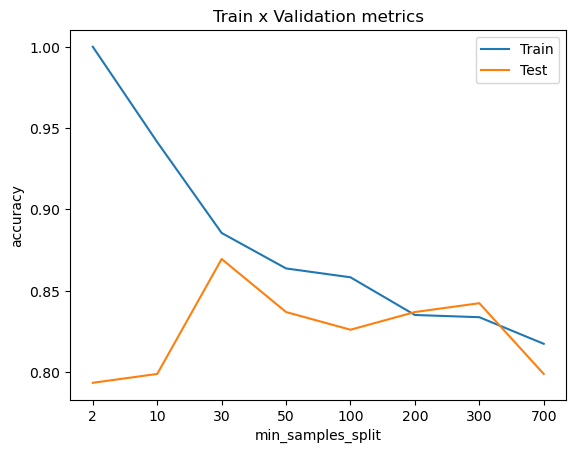

In [36]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state =42).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_test)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])
plt.show()

**in the plot we have : if the min samples split increase, overfitting start to decrease !!!!**

**==> with the max depth:**

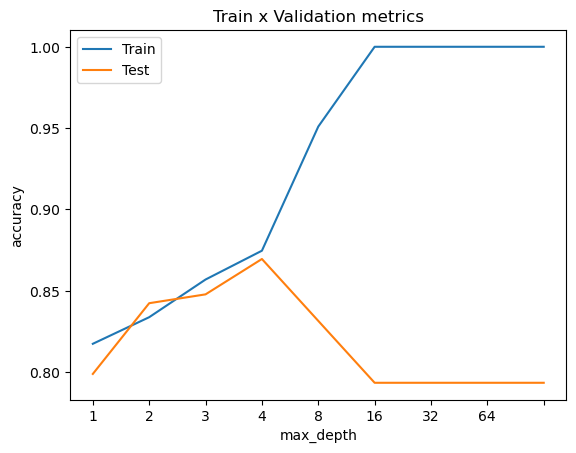

In [42]:
accuracy_list_train = []
accuracy_list_val = []
for maxi in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth=maxi, random_state =42).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,Y_train)
    accuracy_test = accuracy_score(predictions_test,Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_test)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])
plt.show()

**In this plot , if we have a small max depth , automaticly the overfitting decrease !**

so in the first time we will choose `maxdepht = 4` and `min samples split = 50`

In [40]:
decision_tree_model1 = DecisionTreeClassifier(min_samples_split =50,max_depth = 4, random_state = 42).fit(X_train, Y_train)
print(f"Decision tree Metrics train:\n\tAccuracy score:{accuracy_score(decision_tree_model1.predict(X_train), Y_train):.4f}")
print(f"Decision tree Metrics validation:\n\tAccuracy score:{accuracy_score(decision_tree_model1.predict(X_test), Y_test):.4f}")

Decision tree Metrics train:
	Accuracy score:0.8556
Decision tree Metrics validation:
	Accuracy score:0.8370


in the second time we will choose `maxdepht = 4` and `min samples split = 200`

In [43]:
decision_tree_model2 = DecisionTreeClassifier(min_samples_split =200,max_depth = 4, random_state = 42).fit(X_train, Y_train)
print(f"Decision tree Metrics train:\n\tAccuracy score:{accuracy_score(decision_tree_model2.predict(X_train), Y_train):.4f}")
print(f"Decision tree Metrics validation:\n\tAccuracy score:{accuracy_score(decision_tree_model2.predict(X_test), Y_test):.4f}")

Decision tree Metrics train:
	Accuracy score:0.8351
Decision tree Metrics validation:
	Accuracy score:0.8370


### **6. The random forest Model :**

# Random Forest Algorithm

Let's now try the Random Forest algorithm as well, using the Scikit-learn implementation.

- All hyperparameters found in the Decision Tree model also exist in this algorithm, as a random forest is an ensemble of many decision trees.
- An additional hyperparameter for Random Forest is called `n_estimators`, which is the number of decision trees that make up the random forest.
- Remember that a random forest randomly selects a subset of features **and** randomly selects a subset of training examples to train each individual tree.
- Following the lessons, if \( n \) is the number of features, we will randomly choose \( \sqrt{n} \) of these features to train each individual tree.
- Note that you can modify this by setting the `max_features` parameter.


In [44]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

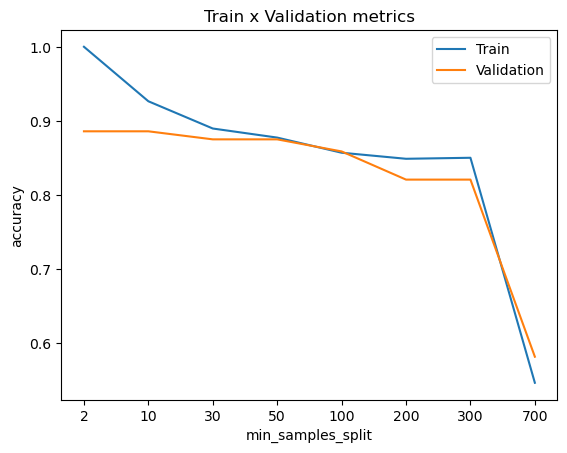

In [46]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,random_state =42).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train, Y_train)
    accuracy_val = accuracy_score(predictions_val, Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
plt.show()

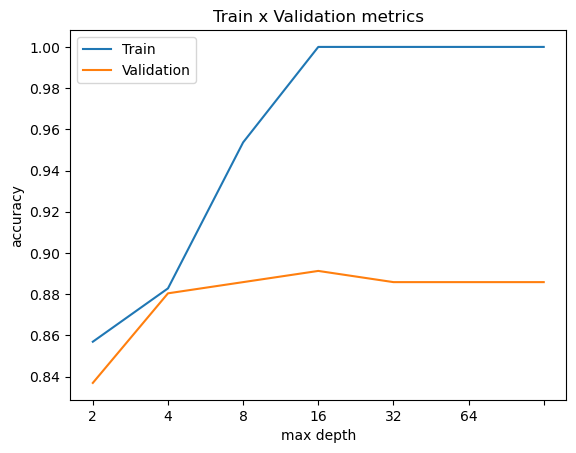

In [47]:
accuracy_list_train = []
accuracy_list_val = []
for maxi in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth=maxi,random_state =42).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train, Y_train)
    accuracy_val = accuracy_score(predictions_val, Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


plt.title('Train x Validation metrics')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
plt.show()

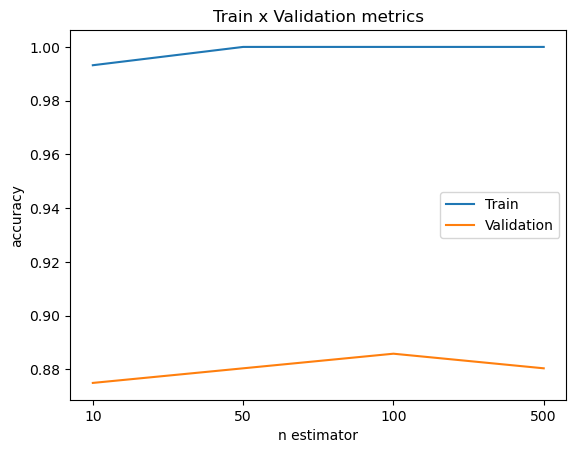

In [48]:
accuracy_list_train = []
accuracy_list_val = []
for n in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators=n,random_state =42).fit(X_train,Y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train, Y_train)
    accuracy_val = accuracy_score(predictions_val, Y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)


plt.title('Train x Validation metrics')
plt.xlabel('n estimator')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])
plt.show()

so we will choose  `max_depth : 16`,   `min_samples_split : 10` and `n_estimators : 100`

In [56]:
random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth= 16, min_samples_split = 10).fit(X_train,Y_train)
print(f"Random forest Metrics train:\n\tAccuracy score:{accuracy_score(random_forest_model.predict(X_train),Y_train):.4f}")
print(f"\nRandomforest Metrics test:\n\tAccuracy score:{accuracy_score(random_forest_model.predict(X_test),Y_test):.4f}")

Random forest Metrics train:
	Accuracy score:0.9223

Randomforest Metrics test:
	Accuracy score:0.8913


### **7. using the GridSearch to choose the best hyperparameters :**

In [57]:
param_grid = {'min_samples_split': [2, 10, 30, 50, 100, 200, 300, 700],'max_depth': [2, 4, 8, 16, 32, 64, None],'n_estimators': [10, 50, 100, 500]}

In [58]:
# Create a RandomForestClassifier
random_forest_model1 = RandomForestClassifier(random_state=42)

In [59]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_model1, param_grid=param_grid, scoring='accuracy')

In [60]:
# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, None],
                         'min_samples_split': [2, 10, 30, 50, 100, 200, 300,
                                               700],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='accuracy')

In [61]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

In [63]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [64]:
# Predictions on the validation set using the best model
predictions_train= best_model.predict(X_train)
predictions_val = best_model.predict(X_test)

In [65]:
# Calculate accuracy on the validation set
accuracy_val = accuracy_score(predictions_val, Y_test)

In [66]:
# Print the best parameters and validation accuracy
print("Best Parameters:", best_params)
print("testing Accuracy:", accuracy_val)
print("Validation Accuracy:", accuracy_val)

Best Parameters: {'max_depth': 16, 'min_samples_split': 10, 'n_estimators': 500}
testing Accuracy: 0.8858695652173914
Validation Accuracy: 0.8858695652173914
